# Pre entrega n°1 - Pamela Perini 
## Análisis de campaña de marketing
**Resumen:**
En este proyecto se analiza la última campaña de marketing que realizó el banco e identificar los patrones que nos ayudarán a sacar conclusiones para desarrollar futuras estrategias en la próxima campaña de marketing. Se tuvieron en cuenta las siguientes caracteristicas: 
- Edad
- Trabajo
- Estado civil
- Educación
- Balance
- Contacto
- Mes
- Depósito 
## **Hipótesis de interés**
- El estado civil tiene una relevancia significativa para determinar el depósito. 
- La edad es un dato relevante en el análisis.
- Los trabajadores en altos puestos tinen mas importancia para establecer un depósito.
## **Objetivos**
- Probar las hipótesis planteadas mediante análisis estadísticos y visualizaciones.
- Identificar patrones y tendencias  en los datos.
- Desarrollar un modelo predictivo para estimar la probabilidad de depositos exitosos en la futura campaña.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [38]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [39]:
columnas_a_eliminar = ['duration', 'campaign', 'pdays', 'previous']
df = df.drop(columns=columnas_a_eliminar)

In [8]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,unknown,yes


# **Gráficos:**

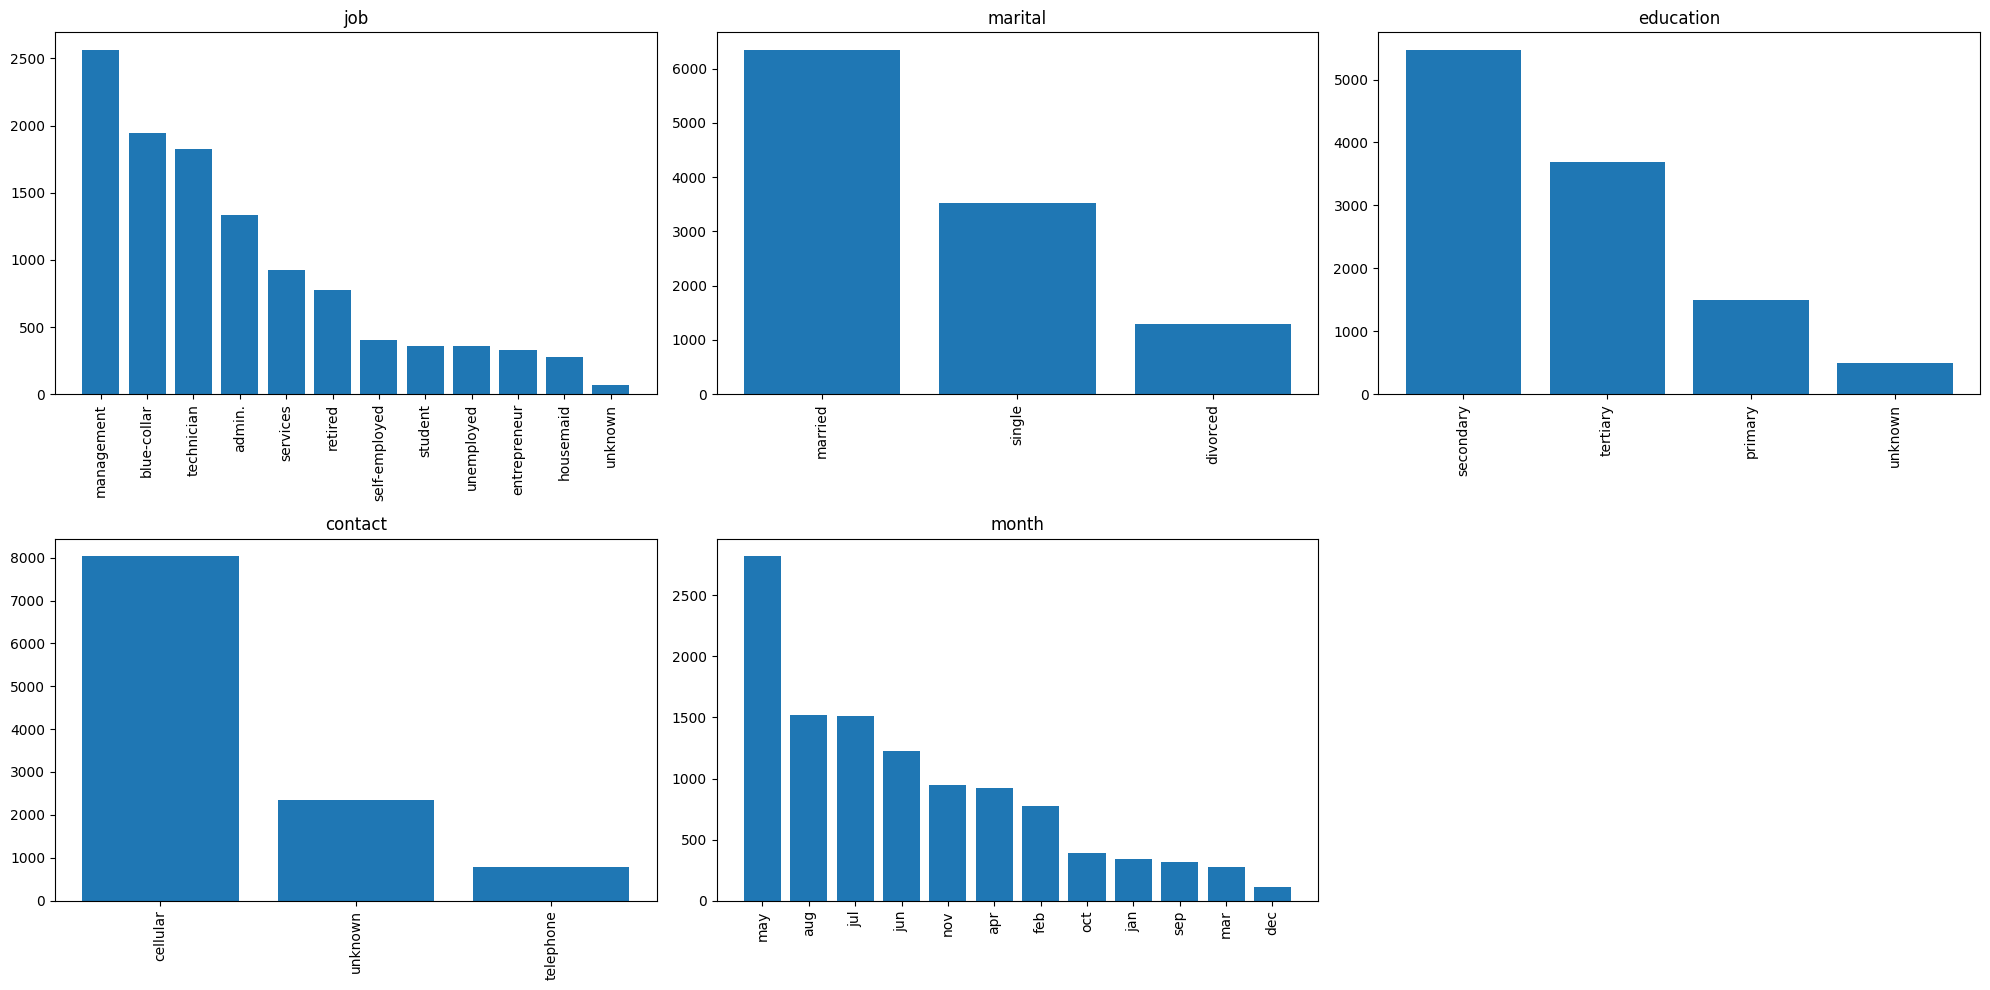

In [16]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month']
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 10))

axs = axs.flatten()
for i, cat_column in enumerate(cat_columns):
    value_counts = df[cat_column].value_counts()
    
    x_pos = np.arange(len(value_counts))
    
    axs[i].bar(x_pos, value_counts.values, tick_label=value_counts.index)
    axs[i].set_title(cat_column)
    
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)
for j in range(len(cat_columns), len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()


Se puede apreciar en los siguientes gráficos las cantidades de personas que les llego la campaña categorizadas por la relación laboral, el estado civil, la educación, el medio por el cual se lo contacto y en que mes se lo hizo.

C:\Users\Pame\AppData\Local\Temp\ipykernel_9116\3883959003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='deposit', y='count', data=value_counts_df, palette='pastel')


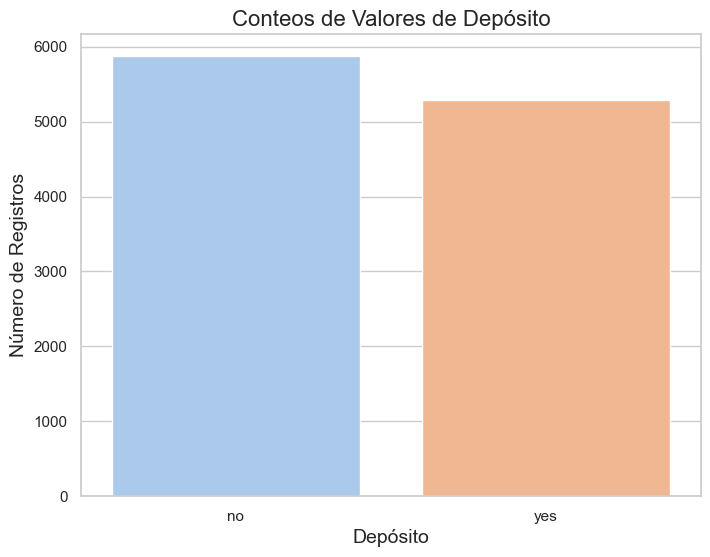

In [42]:
value_counts = df['deposit'].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['deposit', 'count']
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='deposit', y='count', data=value_counts_df, palette='pastel')
ax.set_title('Conteos de Valores de Depósito', fontsize=16)
ax.set_xlabel('Depósito', fontsize=14)
ax.set_ylabel('Número de Registros', fontsize=14)
plt.show()

En este gráfico se puede ver que el total de personas en que la campaña dio resultados y depositaron, es aproximadamente menos de la mitad, del total de personas que les llego la campaña.

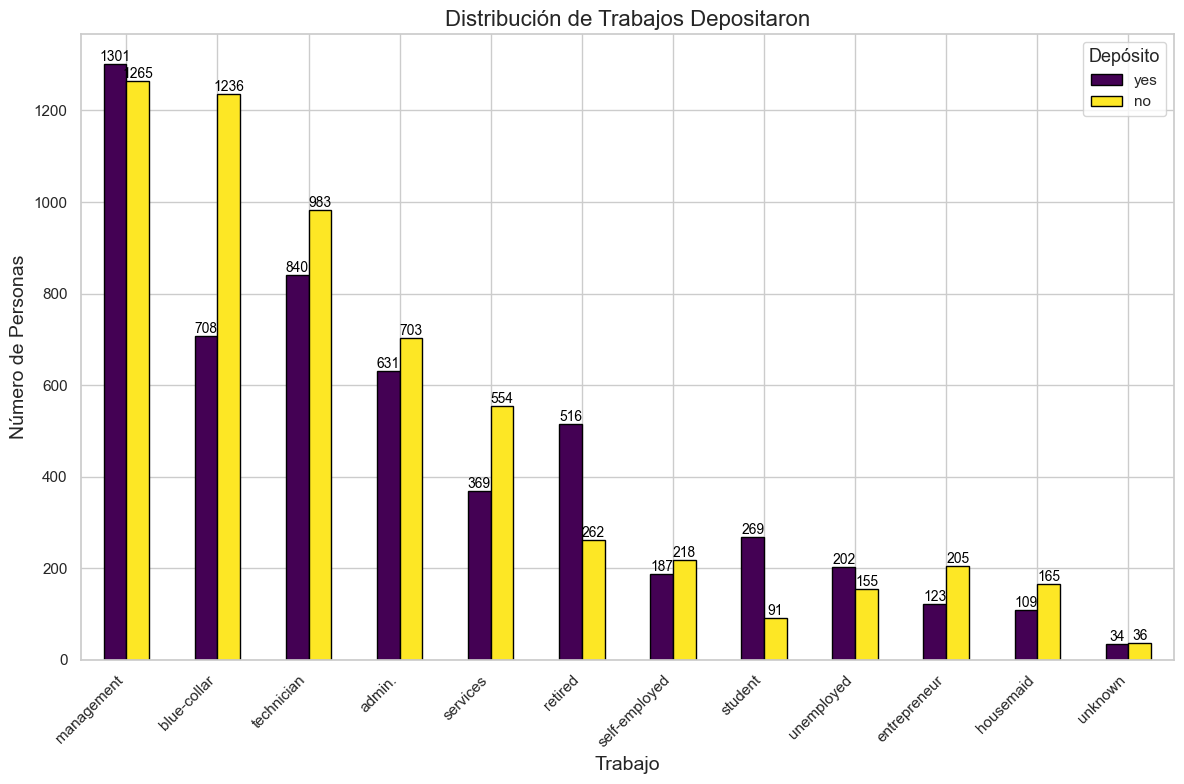

In [40]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()
j_df = j_df.fillna(0)
j_df = j_df.loc[j_df.sum(axis=1).sort_values(ascending=False).index]
ax = j_df.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
ax.set_title('Distribución de Trabajos Depositaron', fontsize=16)
ax.set_xlabel('Trabajo', fontsize=14)
ax.set_ylabel('Número de Personas', fontsize=14)
ax.legend(title='Depósito', title_fontsize='13', fontsize='11')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En el gráfico de barras superior se puede analizar que tienen mas probabilidades de que depositen las personas con cargos de Management, los retirados y los estudiantes; y menos probabilidades de que la campaña surga efecto en personas que realizan trabajos físicos, quienes ofecen servicios y emprendedores

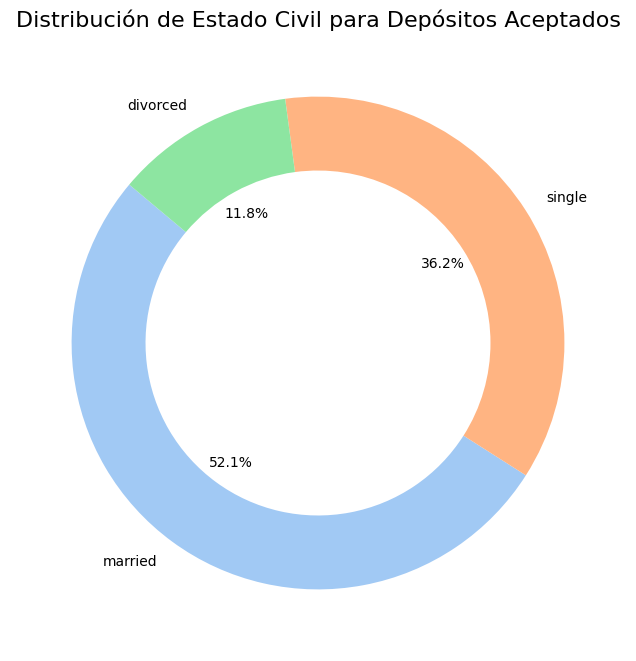

In [23]:
filtered_df = df[df['deposit'] == 'yes']
marital_counts = filtered_df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribución de Estado Civil para Depósitos Aceptados', fontsize=16)
plt.show()

El gráfico muestra que tienen mas posisbilidades de depositos exitosos si la persona esta casada y lo contrario si esta divorsiada 

C:\Users\Pame\AppData\Local\Temp\ipykernel_9116\2523870062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="job", y="age", data=df, palette="Set2", notch=True, fliersize=5)


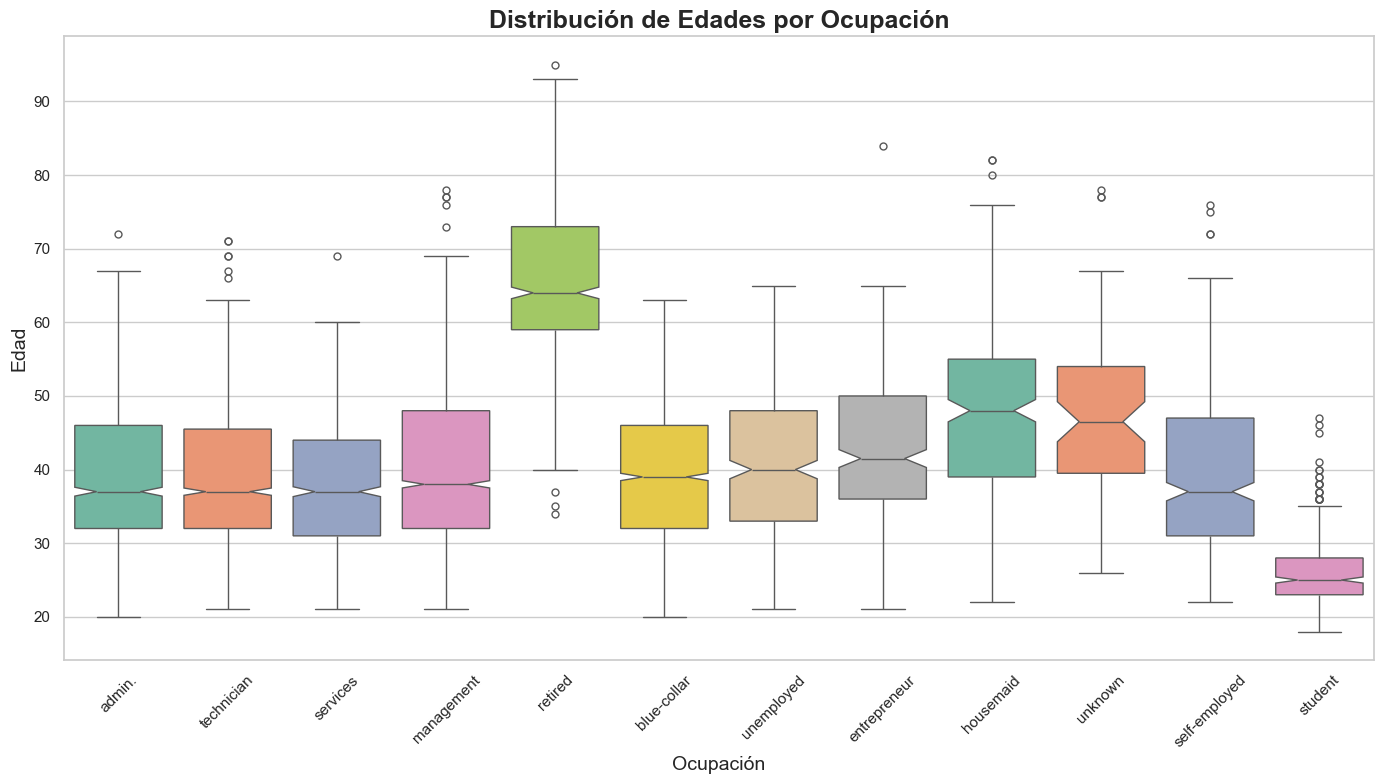

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x="job", y="age", data=df, palette="Set2", notch=True, fliersize=5)
ax.set_title('Distribución de Edades por Ocupación', fontsize=18, weight='bold')
ax.set_xlabel('Ocupación', fontsize=14)
ax.set_ylabel('Edad', fontsize=14)
plt.xticks(rotation=45)
for i, artist in enumerate(ax.artists):
    artist.set_edgecolor('black')
    artist.set_linewidth(1.5)
plt.tight_layout()
plt.show()

Aquí se muestra la edad promedio por ocupación, con el fin de analizar las edades de las personas a quien deben dirigirse las campañas.

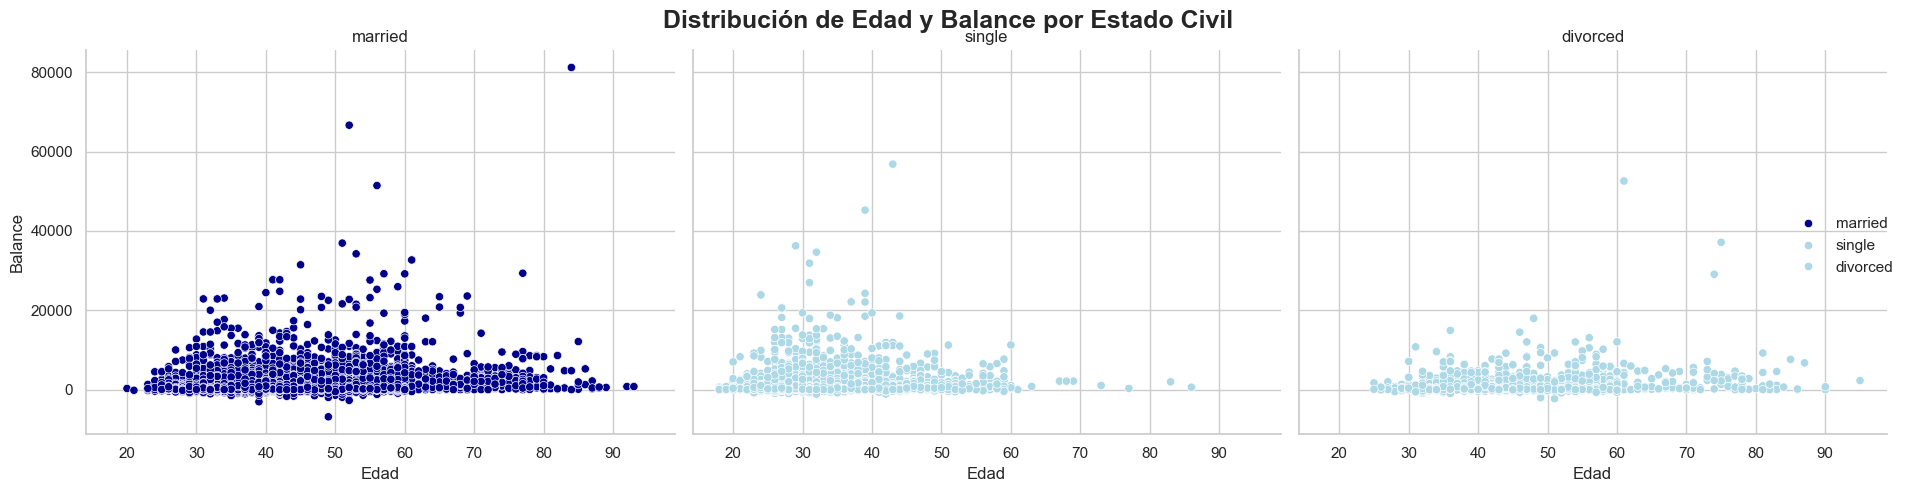

In [47]:
marital_counts = df['marital'].value_counts()
color_map = {
    'married': 'darkblue' if marital_counts['married'] > 4000 else 'lightblue',
    'single': 'darkblue' if marital_counts['single'] > 40000 else 'lightblue',
    'divorced': 'darkblue' if marital_counts['divorced'] > 40000 else 'lightblue'
}
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="marital", col_wrap=3, height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="age", y="balance", hue="marital", palette=color_map)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Edad", "Balance")
g.fig.suptitle('Distribución de Edad y Balance por Estado Civil', fontsize=18, weight='bold')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)
plt.show()



En estos gráficos se muestra la distribución del balance analizando su edad y estado civil. Si los datos analizados son mas de 40.000, en el gráfico se refeljaran con un color azul oscuro.

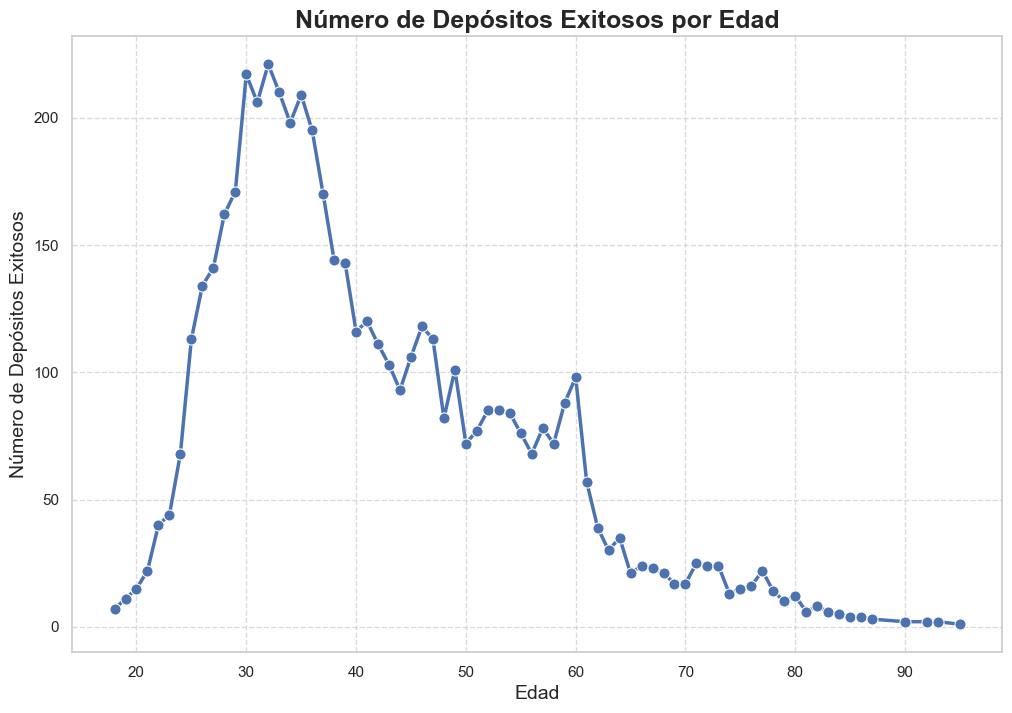

In [44]:
successful_deposits_df = df[df['deposit'] == 'yes']
age_deposit_counts = successful_deposits_df['age'].value_counts().sort_index()
age_deposit_df = pd.DataFrame({
    'age': age_deposit_counts.index,
    'count': age_deposit_counts.values
})
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=age_deposit_df, x='age', y='count', marker='o', color='b', linewidth=2.5, markersize=8)
plt.title('Número de Depósitos Exitosos por Edad', fontsize=18, weight='bold')
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Número de Depósitos Exitosos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Se puede apreciar entre los 25 años y los 35 las personas tienen mas probabilidades de que depositen en el banco 

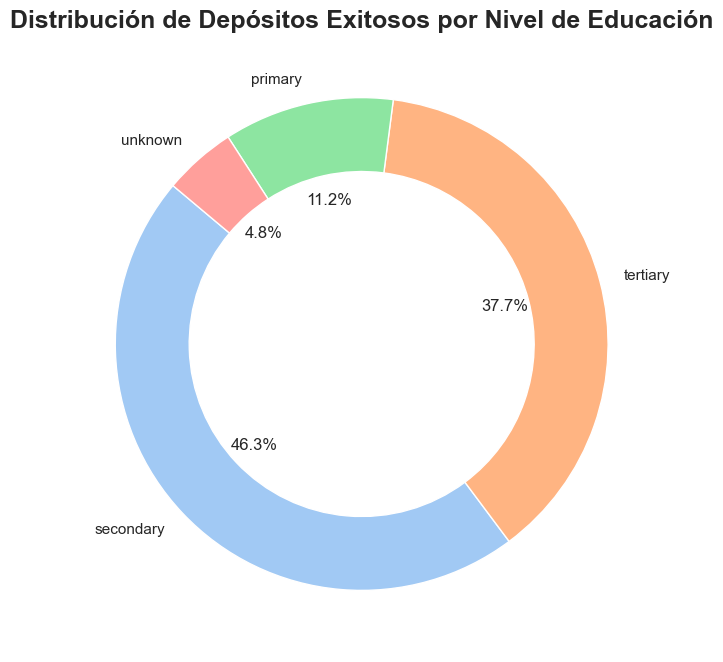

In [46]:
successful_deposits_df = df[df['deposit'] == 'yes']
education_counts = successful_deposits_df['education'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribución de Depósitos Exitosos por Nivel de Educación', fontsize=18, weight='bold')
plt.show()

## **Conclusión:**

La campaña de marketing fue exitosa cumpliendo su objetivo en personas casadas, con cargos de Management, los retirados y los estudiantes, y en personas que se encontaron entre los 25 y 35 años de edad.